In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
# import catboost
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
bd = pd.read_csv('DataBase.csv')
bd.head(3)

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,1,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,1,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,1,30978.18,1.0,539451.0,0,0


In [7]:
bd[bd['issue_flg'] == 0][bd['paid_flg'] == 1].head(5)

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,issue_flg,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg


In [29]:
meanCost = bd['auto_cost'].mean()
sigmaCost = bd['auto_cost'].std()

meanAmt = bd['total_premium_amt'].mean()
sigmaAmt = bd['total_premium_amt'].std()

meanExp = bd['min_driver_experience_years_cnt'].mean()
sigmaExp = bd['min_driver_experience_years_cnt'].std()

bd = bd[bd['auto_cost'] < meanCost + 2*sigmaCost][bd['auto_cost'] > meanCost - 2*sigmaCost][bd['total_premium_amt'] < meanAmt + 2*sigmaAmt][bd['total_premium_amt'] > meanAmt - 2*sigmaAmt][bd['min_driver_experience_years_cnt'] < meanExp + 2*sigmaExp][bd['min_driver_experience_years_cnt'] > meanExp - 2*sigmaExp]
bd

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_issue_year,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,2013,1,18,M,41.0,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,2017,0,13,M,34.0,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,2021,1,13,M,33.0,30978.18,1.0,539451.0,0,0
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,2016,0,22,F,56.0,366241.86,0.0,0.0,0,0
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,2019,0,24,M,53.0,394095.24,0.0,479898.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,2019,1,5,M,28.0,65162.61,0.0,0.0,0,0
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,2018,0,5,M,25.0,0.00,0.0,0.0,0,0
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,2021,0,24,M,44.0,347329.62,0.0,0.0,0,0
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,2015,0,20,M,53.0,0.00,0.0,0.0,0,0


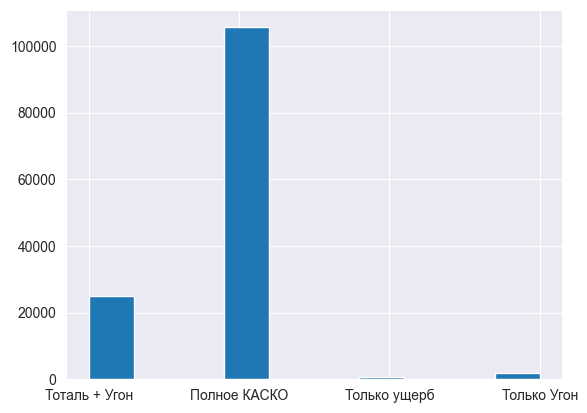

In [46]:
plt.hist(bd['coverage'])
plt.show()

In [19]:
bd.drop(['issue_flg'], axis=1, inplace=True)

In [20]:
bd.head(3)

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_issue_year,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,2013,1,18,M,41.0,67325.31,0.0,0.0,0,0
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,2017,0,13,M,34.0,0.00,0.0,0.0,0,0
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,2021,1,13,M,33.0,30978.18,1.0,539451.0,0,0


In [30]:
bd['coverage'].unique()

array(['Тоталь + Угон', 'Полное КАСКО', 'Только ущерб', 'Только Угон'],
      dtype=object)

In [47]:
ForCorrel = bd[bd['coverage'] == 'Полное КАСКО'].select_dtypes(include='number')
Corr = ForCorrel.corr()
Corr['paid_flg'].sort_values(ascending=False)

paid_flg                           1.000000
renewed_issue_flg                  0.700443
renewed_paid_flg                   0.554953
vehicle_new_flg                    0.105144
expected_loss_amt                  0.101564
vehicle_credit_flg                 0.044660
vehicle_issue_year                 0.022115
auto_cost                         -0.000703
Unnamed: 0                        -0.002352
premium_transition_amt            -0.016576
age                               -0.025073
policy_rk                         -0.028894
min_driver_experience_years_cnt   -0.039723
transition_flg                    -0.041244
vehicle_mileage_km_amt            -0.046270
audatex_total_cost_amt            -0.046606
audatex_claim_cnt                 -0.075113
total_premium_amt                 -0.099415
Name: paid_flg, dtype: float64

In [49]:
print(bd[bd['vehicle_credit_flg'] == 0]['paid_flg'].sum()/bd[bd['vehicle_credit_flg'] == 0]['paid_flg'].count(), bd[bd['vehicle_credit_flg'] == 1]['paid_flg'].sum()/bd[bd['vehicle_credit_flg'] == 1]['paid_flg'].count())

0.18605121855392712 0.23082546451416389


In [44]:
bd['region'].value_counts()

region
Москва                 68713
Санкт-Петербург        12382
Московская область      9455
Краснодарский край      5097
Пензенская область      3933
                       ...  
Магаданская область       16
Республика Алтай          14
Амурская область          12
Сахалинская область        7
Республика Калмыкия        3
Name: count, Length: 75, dtype: int64

In [45]:
bd.to_csv('/Users/ssd/Downloads/dataBase.csv')

In [58]:
tpac = bd[['total_premium_amt', 'coverage']]
df = pd.DataFrame({'type': ['Полное КАСКО', 'Тоталь + Угон', 'Только Угон', 'Только ущерб'], 'average' : [bd[bd['coverage'] == 'Полное КАСКО']['total_premium_amt'].mean(), bd[bd['coverage'] == 'Тоталь + Угон']['total_premium_amt'].mean(), bd[bd['coverage'] == 'Только Угон']['total_premium_amt'].mean(), bd[bd['coverage'] == 'Только ущерб']['total_premium_amt'].mean()]})
df

,type,average
0,Полное КАСКО,530870.362143
1,Тоталь + Угон,205788.691126
2,Только Угон,112054.041445
3,Только ущерб,477191.769602


In [55]:
bd['coverage'].value_counts()


coverage
Полное КАСКО     105587
Тоталь + Угон     25103
Только Угон        1820
Только ущерб        728
Name: count, dtype: int64

In [63]:
bd['k'] = bd['auto_cost']/bd['total_premium_amt']

In [64]:
bd

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,67325.31,0.0,0.0,0,0,3.226457
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,0.00,0.0,0.0,0,0,3.044266
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,30978.18,1.0,539451.0,0,0,4.683696
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,F,56.0,366241.86,0.0,0.0,0,0,2.393776
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,M,53.0,394095.24,0.0,479898.0,0,0,5.866750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,M,28.0,65162.61,0.0,0.0,0,0,9.079118
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,M,25.0,0.00,0.0,0.0,0,0,7.148921
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,M,44.0,347329.62,0.0,0.0,0,0,4.779090
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,M,53.0,0.00,0.0,0.0,0,0,3.256003


In [83]:
bd[bd['region'].isin(['Москва'])]['paid_flg'].sum()/bd[bd['region'].isin(['Москва'])]['paid_flg'].count()

np.float64(0.19127384919884155)

In [84]:
bd[bd['region'] != 'Москва']['paid_flg'].sum()/bd[bd['region'] != 'Москва']['paid_flg'].count()

np.float64(0.21466098411468423)

In [118]:
ForCorrel = bd.select_dtypes(include='number')
Corr = ForCorrel.corr()
Corr['paid_flg'].sort_values(ascending=False)

paid_flg                           1.000000
renewed_issue_flg                  0.693922
renewed_paid_flg                   0.556497
vehicle_new_flg                    0.086626
k                                  0.077121
new_and_credit                     0.076424
expected_loss_amt                  0.073273
vehicle_credit_flg                 0.053771
vehicle_issue_year                 0.007145
Unnamed: 0                        -0.001121
age_of_car                        -0.007145
auto_cost                         -0.013264
premium_transition_amt            -0.020738
age                               -0.020987
vehicle_mileage_km_amt            -0.027310
min_driver_experience_years_cnt   -0.033652
policy_rk                         -0.033869
transition_flg                    -0.043164
audatex_total_cost_amt            -0.048812
audatex_claim_cnt                 -0.074321
total_premium_amt                 -0.107790
Name: paid_flg, dtype: float64

In [86]:
bd[['k', 'paid_flg']]

,k,paid_flg
0,3.226457,0
1,3.044266,0
2,4.683696,1
3,2.393776,0
4,5.866750,0
...,...,...
148470,9.079118,0
148471,7.148921,1
148472,4.779090,0
148473,3.256003,0


In [88]:
bd[bd['audatex_claim_cnt'] != 0]['paid_flg'].sum()/bd[bd['audatex_claim_cnt'] != 0]['paid_flg'].count()

np.float64(0.16132824683893568)

In [90]:
bd[bd['audatex_claim_cnt'] == 0]['paid_flg'].sum()/bd[bd['audatex_claim_cnt'] == 0]['paid_flg'].count()


np.float64(0.2213873021767385)

In [94]:
bd[bd['k'] < 60]

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,67325.31,0.0,0.0,0,0,3.226457
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,0.00,0.0,0.0,0,0,3.044266
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,30978.18,1.0,539451.0,0,0,4.683696
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,F,56.0,366241.86,0.0,0.0,0,0,2.393776
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,M,53.0,394095.24,0.0,479898.0,0,0,5.866750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,M,28.0,65162.61,0.0,0.0,0,0,9.079118
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,M,25.0,0.00,0.0,0.0,0,0,7.148921
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,M,44.0,347329.62,0.0,0.0,0,0,4.779090
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,M,53.0,0.00,0.0,0.0,0,0,3.256003


In [95]:
bd

,Unnamed: 0,policy_rk,total_premium_amt,coverage,repair_option,paid_flg,region,auto_make,auto_model,auto_cost,...,vehicle_credit_flg,min_driver_experience_years_cnt,insurant_gender_cd,age,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k
0,0,376775127,495900.00,Тоталь + Угон,Ремонт на СТОА официального дилера,0,Москва,Toyota,Toyota Rav4,1600000.0,...,1,18,M,41.0,67325.31,0.0,0.0,0,0,3.226457
1,1,284447889,418820.22,Полное КАСКО,Ремонт на СТОА официального дилера,0,Московская область,Mini (BMW),Mini (BMW) Mini \tClubman,1275000.0,...,0,13,M,34.0,0.00,0.0,0.0,0,0,3.044266
2,2,384100566,209520.00,Тоталь + Угон,Ремонт на СТОА официального дилера,1,Москва,Hyundai,Hyundai Solaris,981328.0,...,1,13,M,33.0,30978.18,1.0,539451.0,0,0,4.683696
3,3,376032837,501300.00,Полное КАСКО,Ремонт на СТОА по направлению страховщика,0,Санкт-Петербург,Jaguar,Jaguar XE,1200000.0,...,0,22,F,56.0,366241.86,0.0,0.0,0,0,2.393776
4,4,286011732,478800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Республика Карелия,Kia,Kia Sorento,2809000.0,...,0,24,M,53.0,394095.24,0.0,479898.0,0,0,5.866750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148470,148470,377770590,231300.00,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,0,Республика Карелия,Kia,Kia Seltos,2100000.0,...,1,5,M,28.0,65162.61,0.0,0.0,0,0,9.079118
148471,148471,293965557,243603.18,Тоталь + Угон,Ремонт на СТОА по направлению страховщика,1,Московская область,BMW,BMW 3er,1741500.0,...,0,5,M,25.0,0.00,0.0,0.0,0,0,7.148921
148472,148472,388760604,457200.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Пензенская область,Hyundai,Hyundai Sonata,2185000.0,...,0,24,M,44.0,347329.62,0.0,0.0,0,0,4.779090
148473,148473,383402733,982800.00,Полное КАСКО,Ремонт на СТОА официального дилера,0,Краснодарский край,Cadillac,Cadillac Escalade,3200000.0,...,0,20,M,53.0,0.00,0.0,0.0,0,0,3.256003


In [109]:
k = [i+1 for i in range(15)]
k.append('16+')
percent = [bd[bd['k'] < i+1][bd['k'] > i]['paid_flg'].sum()/bd[bd['k'] < i+1][bd['k'] > i]['paid_flg'].count() for i in range(15)]
percent.append(bd[bd['k'] > 15]['paid_flg'].sum()/bd[bd['k'] > 15]['paid_flg'].count())
count = [bd[bd['k'] < i+1][bd['k'] > i]['paid_flg'].count() for i in range(15)]
count.append(bd[bd['k'] > 15]['paid_flg'].count())
df = pd.DataFrame({'k' : k, 'percent' : percent, 'count' : count})
df

,k,percent,count
0,1,0.039216,408
1,2,0.099038,5301
2,3,0.134163,19208
3,4,0.170661,25536
4,5,0.205323,23709
5,6,0.233280,17404
6,7,0.235680,11732
7,8,0.254405,7378
8,9,0.257837,5104
9,10,0.250119,4206


In [114]:
bd['age_of_car'] = 2022-bd['vehicle_issue_year']

In [117]:
bd['new_and_credit'] = bd['vehicle_credit_flg'] * bd['vehicle_new_flg']

In [121]:
bd['new_or_credit'] = bd['vehicle_credit_flg'] + bd['vehicle_new_flg']

In [122]:
bd[bd['new_or_credit'] == 0]['paid_flg'].sum()/bd[bd['new_or_credit'] == 0]['paid_flg'].count()

np.float64(0.17881452070334658)

In [123]:
bd[bd['new_or_credit'] == 1]['paid_flg'].sum()/bd[bd['new_or_credit'] == 1]['paid_flg'].count()

np.float64(0.22198870894630568)

In [124]:
bd[bd['new_or_credit'] == 2]['paid_flg'].sum()/bd[bd['new_or_credit'] == 2]['paid_flg'].count()

np.float64(0.3357718722006569)

In [140]:
bd.to_csv('/Users/ssd/Downloads/dataBase.csv')

In [163]:
bd['new_credit'] = 2*bd['vehicle_credit_flg'] + bd['vehicle_new_flg']

In [164]:
bd[bd['new_credit'] == 0]['paid_flg'].sum()/bd[bd['new_credit'] == 0]['paid_flg'].count() # не новая, не кредит

np.float64(0.17862605231026282)

In [165]:
bd[bd['new_credit'] == 1]['paid_flg'].sum()/bd[bd['new_credit'] == 1]['paid_flg'].count() # новая, не кредит

np.float64(0.27941176470588236)

In [166]:
bd[bd['new_credit'] == 2]['paid_flg'].sum()/bd[bd['new_credit'] == 2]['paid_flg'].count() # не новая, кредит

np.float64(0.21430418125837308)

In [167]:
bd[bd['new_credit'] == 3]['paid_flg'].sum()/bd[bd['new_credit'] == 3]['paid_flg'].count() # новая, кредит

np.float64(0.3357718722006569)

In [134]:
bd = bd.drop_duplicates()

In [153]:
bd['transition_flg'] = bd['transition_flg'].fillna(0)
bd['vehicle_credit_flg'] = bd['vehicle_credit_flg'].fillna(0)
bd['vehicle_new_flg'] = bd['vehicle_new_flg'].fillna(0)

In [154]:
bd['transition_new_credit'] = bd['transition_flg']*4 + 2*bd['vehicle_credit_flg'] + bd['vehicle_new_flg']

In [159]:
bd[bd['transition_new_credit'] == 5]['paid_flg'].sum()/bd[bd['transition_new_credit'] == 5]['paid_flg'].count()

np.float64(0.1)

In [177]:
bd['k2'] = bd['audatex_total_cost_amt'] / bd['expected_loss_amt']
k2 = [i+1 for i in range(15)]
k.append('16+')
percent = [bd[bd['k2'] < i+1][bd['k2'] > i]['paid_flg'].sum()/bd[bd['k2'] < i+1][bd['k2'] > i]['paid_flg'].count() for i in range(15)]
percent.append(bd[bd['k2'] > 15]['paid_flg'].sum()/bd[bd['k2'] > 15]['paid_flg'].count())
count = [bd[bd['k2'] < i+1][bd['k2'] > i]['paid_flg'].count() for i in range(15)]
count.append(bd[bd['k2'] > 15]['paid_flg'].count())
df = pd.DataFrame({'k2' : k, 'percent' : percent, 'count' : count})
df

ValueError: All arrays must be of the same length

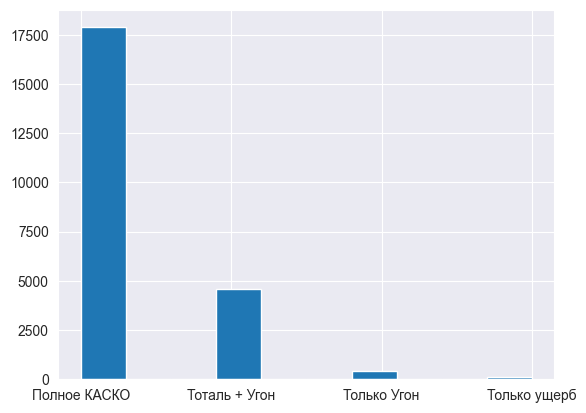

In [314]:
h = db['coverage'].hist()
fig = h.get_figure()

In [309]:
db = pd.read_csv('data_grouped_filtered.csv')

In [196]:
db['new_and_credit'] = db['vehicle_credit_flg'] * db['vehicle_new_flg']

In [232]:
db[db['region'] == 'Москва'][db['new_and_credit'] == 1]['paid_flg'].sum()/db[db['region'] == 'Москва'][db['new_and_credit'] == 1]['paid_flg'].count()

np.float64(0.5191256830601093)

In [233]:
db[db['region'] != 'Москва'][db['new_and_credit'] == 0]['paid_flg'].sum()/db[db['region'] != 'Москва'][db['new_and_credit'] == 0]['paid_flg'].count()

np.float64(0.28921474049778123)

In [208]:
db[db['new_and_credit'] == 1]

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit
47,283936248,Полное КАСКО,Ремонт на СТОА официального дилера,Московская область,Porsche,Porsche Panamera,M,1296000.0,0.0,3587537.0,...,330170.760,0.0,0.0,0.0,0.0,2.768161,1.0,1.0,2.0,3.0
64,283944072,Полное КАСКО,Ремонт на СТОА официального дилера,Воронежская область,Kia,Kia Rio,F,593901.0,1.0,1550000.0,...,454976.820,0.0,0.0,0.0,0.0,2.609863,1.0,1.0,2.0,3.0
69,283945218,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Renault,Renault Kaptur,M,662013.0,0.0,1700000.0,...,227790.360,0.0,0.0,0.0,0.0,2.567925,1.0,1.0,2.0,3.0
72,283946508,Полное КАСКО,Ремонт на СТОА официального дилера,Московская область,Porsche,Porsche Panamera,M,1296000.0,0.0,3587537.0,...,330170.760,0.0,0.0,0.0,0.0,2.768161,1.0,1.0,2.0,3.0
80,283949973,Полное КАСКО,Ремонт на СТОА официального дилера,Смоленская область,Hyundai,Hyundai Solaris,M,449361.0,1.0,1700000.0,...,167177.655,0.0,0.0,0.0,0.0,3.783150,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22953,391634049,Полное КАСКО,Ремонт на СТОА официального дилера,Санкт-Петербург,exeed,exeed txl,M,712800.0,0.0,2849900.0,...,166916.160,0.0,0.0,0.0,0.0,3.998176,0.0,1.0,2.0,3.0
22959,391634934,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Haval,Haval JOLION,F,763200.0,0.0,2500000.0,...,199204.335,0.0,0.0,0.0,0.0,3.275681,0.0,1.0,2.0,3.0
22964,391635900,Полное КАСКО,Ремонт на СТОА официального дилера,Московская область,Hyundai,Hyundai PALISADE,M,833400.0,1.0,4000000.0,...,216485.775,0.0,0.0,1.0,1.0,4.799616,1.0,1.0,2.0,3.0
22979,391637469,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Kia,Kia Rio,F,456300.0,0.0,2100000.0,...,115816.590,0.0,0.0,0.0,0.0,4.602235,1.0,1.0,2.0,3.0


In [229]:
cars = db['auto_make'].value_counts()
cars = cars.rename("counts")
cars[cars["counts"] > 100]

KeyError: 'counts'

In [216]:
db[db['vehicle_mileage_km_amt'] < 70000]

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit
0,283363056,Полное КАСКО,Ремонт на СТОА официального дилера,Иркутская область,Mazda,Mazda CX-9,M,787323.60,1.0,2340000.0,...,0.000,0.0,0.0,0.0,0.0,2.972094,4.0,0.0,0.0,0.0
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1.0,1765800.0,...,0.000,0.0,0.0,1.0,1.0,52.669444,3.0,0.0,0.0,0.0
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0.0,2200000.0,...,175635.000,0.0,0.0,0.0,0.0,4.067295,1.0,0.0,1.0,1.0
3,283594449,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Mini (BMW),Mini (BMW) Countryman,F,374400.00,0.0,2325000.0,...,124295.265,1.0,626679.0,0.0,0.0,6.209936,2.0,0.0,0.0,0.0
4,283594911,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Санкт-Петербург,Renault,Renault Kaptur,F,231300.00,1.0,1390000.0,...,124247.160,0.0,0.0,0.0,0.0,6.009511,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,392100519,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Hyundai,Hyundai Grand Starex,M,545949.90,1.0,3600000.0,...,0.000,0.0,0.0,1.0,0.0,6.594012,2.0,0.0,0.0,0.0
23003,392728452,Тоталь + Угон,Ремонт на СТОА официального дилера,Чувашская республика,Lada,Lada Largus,M,98100.00,1.0,520000.0,...,35320.050,0.0,0.0,1.0,1.0,5.300714,4.0,0.0,1.0,2.0
23004,393376635,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Sportage,M,127800.00,0.0,1737547.0,...,15610.950,1.0,214731.0,0.0,0.0,13.595829,3.0,0.0,1.0,2.0
23005,394837443,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Seltos,M,99000.00,0.0,1698387.0,...,10898.460,1.0,129114.0,0.0,0.0,17.155424,2.0,0.0,1.0,2.0


In [230]:
db

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit
0,283363056,Полное КАСКО,Ремонт на СТОА официального дилера,Иркутская область,Mazda,Mazda CX-9,M,787323.60,1.0,2340000.0,...,0.000,0.0,0.0,0.0,0.0,2.972094,4.0,0.0,0.0,0.0
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1.0,1765800.0,...,0.000,0.0,0.0,1.0,1.0,52.669444,3.0,0.0,0.0,0.0
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0.0,2200000.0,...,175635.000,0.0,0.0,0.0,0.0,4.067295,1.0,0.0,1.0,1.0
3,283594449,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Mini (BMW),Mini (BMW) Countryman,F,374400.00,0.0,2325000.0,...,124295.265,1.0,626679.0,0.0,0.0,6.209936,2.0,0.0,0.0,0.0
4,283594911,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Санкт-Петербург,Renault,Renault Kaptur,F,231300.00,1.0,1390000.0,...,124247.160,0.0,0.0,0.0,0.0,6.009511,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,392100519,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Hyundai,Hyundai Grand Starex,M,545949.90,1.0,3600000.0,...,0.000,0.0,0.0,1.0,0.0,6.594012,2.0,0.0,0.0,0.0
23003,392728452,Тоталь + Угон,Ремонт на СТОА официального дилера,Чувашская республика,Lada,Lada Largus,M,98100.00,1.0,520000.0,...,35320.050,0.0,0.0,1.0,1.0,5.300714,4.0,0.0,1.0,2.0
23004,393376635,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Sportage,M,127800.00,0.0,1737547.0,...,15610.950,1.0,214731.0,0.0,0.0,13.595829,3.0,0.0,1.0,2.0
23005,394837443,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Seltos,M,99000.00,0.0,1698387.0,...,10898.460,1.0,129114.0,0.0,0.0,17.155424,2.0,0.0,1.0,2.0


In [234]:
db[db['region'] == 'Москва'][db['new_and_credit'] == 0]['paid_flg'].sum()/db[db['region'] == 'Москва'][db['new_and_credit'] == 0]['paid_flg'].count()

np.float64(0.2564193377014344)

In [235]:
db[db['region'] == 'Москва'][db['new_and_credit'] == 1]['paid_flg'].sum()/db[db['region'] == 'Москва'][db['new_and_credit'] == 1]['paid_flg'].count()

np.float64(0.5191256830601093)

In [236]:
db[db['region'] != 'Москва'][db['new_and_credit'] == 1]['paid_flg'].sum()/db[db['region'] != 'Москва'][db['new_and_credit'] == 1]['paid_flg'].count()

np.float64(0.3968609865470852)

In [237]:
db[db['region'] != 'Москва'][db['new_and_credit'] == 0]['paid_flg'].sum()/db[db['region'] != 'Москва'][db['new_and_credit'] == 0]['paid_flg'].count()

np.float64(0.28921474049778123)

In [238]:
db[db['region'] != 'Москва'][db['new_and_credit'] == 1]['paid_flg'].count()

np.int64(892)

In [242]:
db[db['region'] == 'Москва']

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1.0,1765800.0,...,0.000,0.0,0.0,1.0,1.0,52.669444,3.0,0.0,0.0,0.0
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0.0,2200000.0,...,175635.000,0.0,0.0,0.0,0.0,4.067295,1.0,0.0,1.0,1.0
3,283594449,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Mini (BMW),Mini (BMW) Countryman,F,374400.00,0.0,2325000.0,...,124295.265,1.0,626679.0,0.0,0.0,6.209936,2.0,0.0,0.0,0.0
5,283595994,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Москва,Kia,Kia Sportage,M,247860.00,0.0,1200095.0,...,93494.025,0.0,0.0,0.0,0.0,4.841826,6.0,0.0,0.0,0.0
6,283597398,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Москва,Renault,Renault Duster,F,186300.00,0.0,1000000.0,...,61968.645,0.0,0.0,0.0,0.0,5.367687,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,391638867,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Москва,Kia,Kia Sportage,F,533169.00,0.0,1800000.0,...,111725.415,0.0,0.0,0.0,0.0,3.376040,3.0,0.0,0.0,0.0
22992,391639413,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Audi,Audi Q7,M,465300.00,0.0,3505036.0,...,217949.805,0.0,0.0,0.0,0.0,7.532852,5.0,0.0,0.0,0.0
22993,391639509,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Москва,Volkswagen,Volkswagen Tiguan,M,408969.00,1.0,2116630.0,...,305789.940,1.0,527085.0,1.0,0.0,5.175527,1.0,0.0,0.0,0.0
23002,392100519,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Hyundai,Hyundai Grand Starex,M,545949.90,1.0,3600000.0,...,0.000,0.0,0.0,1.0,0.0,6.594012,2.0,0.0,0.0,0.0


In [310]:
db['new_credit'] = 2 * db['vehicle_credit_flg'] + db['vehicle_new_flg']
db[db['region'] == 'Москва'][db['new_credit'] == 0]['paid_flg'].sum() / db[db['region'] == 'Москва'][db['new_credit'] == 0]['paid_flg'].count()  # не бита не крашена     (не новая, не кредит)

np.float64(0.23576583801122694)

In [311]:
db[db['region'] == 'Москва'][db['new_credit'] == 1]['paid_flg'].sum() / db[db['region'] == 'Москва'][db['new_credit'] == 1]['paid_flg'].count()  # новая, не кредит

np.float64(0.3709150326797386)

In [312]:
db[db['region'] == 'Москва'][db['new_credit'] == 2]['paid_flg'].sum() / db[db['region'] == 'Москва'][db['new_credit'] == 2]['paid_flg'].count()  # не новая, кредит

np.float64(0.2847785402370555)

In [313]:
db[db['region'] == 'Москва'][db['new_credit'] == 3]['paid_flg'].sum() / db[db['region'] == 'Москва'][db['new_credit'] == 3]['paid_flg'].count()  # москва, новая, кредит

np.float64(0.5132978723404256)

In [263]:
db[db['region'] != 'Москва'][db['new_credit'] == 3]['paid_flg'].sum() / db[db['region'] != 'Москва'][db['new_credit'] == 3]['paid_flg'].count()  # новая, кредит

np.float64(0.3968609865470852)

In [262]:
db[db['region'] == 'Москва'][db['new_credit'] == 3]['paid_flg'].count() 

np.int64(366)

In [258]:
db[db['region'] == 'Москва'][db['new_credit'] == 3]['paid_flg'].count() 

np.int64(1258)

In [264]:
db[db['new_credit'] == 3]['paid_flg'].sum() / db[db['new_credit'] == 3]['paid_flg'].count()  # новая, кредит

np.float64(0.43243243243243246)

In [265]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [266]:
db['msk_flg'] = db['region'] == 'Москва'

In [267]:
db.head(3)

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit,msk_flg
0,283363056,Полное КАСКО,Ремонт на СТОА официального дилера,Иркутская область,Mazda,Mazda CX-9,M,787323.60,1.0,2340000.0,...,0.0,0.0,0.0,0.0,2.972094,4.0,0.0,0.0,0.0,False
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1.0,1765800.0,...,0.0,0.0,1.0,1.0,52.669444,3.0,0.0,0.0,0.0,True
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0.0,2200000.0,...,0.0,0.0,0.0,0.0,4.067295,1.0,0.0,1.0,1.0,True


In [274]:
X = db[['msk_flg', 'vehicle_credit_flg', 'vehicle_new_flg']].dropna()
Y = db['paid_flg'].dropna()

X = sm.add_constant(X, prepend=False)

,msk_flg,vehicle_credit_flg,vehicle_new_flg,const
0,False,0.0,0.0,1.0
1,True,0.0,0.0,1.0
2,True,0.0,1.0,1.0
3,True,0.0,0.0,1.0
4,False,0.0,0.0,1.0
...,...,...,...,...
23002,True,0.0,0.0,1.0
23003,False,1.0,0.0,1.0
23004,False,1.0,0.0,1.0
23005,False,1.0,0.0,1.0


In [289]:
X = sm.add_constant(X, prepend=False)

model = OLS((Y), (X))
res = model.fit()
print(res.summary())

ValueError: The indices for endog and exog are not aligned

In [287]:
X['msk_flg'] = X['msk_flg'].astype(float)

In [285]:
X

,msk_flg,vehicle_credit_flg,vehicle_new_flg,const
0,0,0.0,0.0,1.0
1,1,0.0,0.0,1.0
2,1,0.0,1.0,1.0
3,1,0.0,0.0,1.0
4,0,0.0,0.0,1.0
...,...,...,...,...
23002,1,0.0,0.0,1.0
23003,0,1.0,0.0,1.0
23004,0,1.0,0.0,1.0
23005,0,1.0,0.0,1.0


In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = db[['msk_flg', 'vehicle_credit_flg', 'vehicle_new_flg']].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [304]:
db['region'].value_counts().sum()
regs = ['Москва', 'Санкт-Петербург', 'Московская Область', 'Краснодарский край', 'Остальное']
count = [11688, 2249, 1617, 918, 6535]
regions = pd.DataFrame({'region': regs, 'count': count})
regions

,region,count
0,Москва,11688
1,Санкт-Петербург,2249
2,Московская Область,1617
3,Краснодарский край,918
4,Остальное,6535


In [301]:
db['vehicle_new_flg'].dropna().value_counts()

vehicle_new_flg
0.0        20601
1.0         2391
[]            13
[0. 1.]        2
Name: count, dtype: int64

In [303]:
null = 20601
one = 2391
new_flg = pd.DataFrame({'new_car_flag': [0, 1], 'count': [null, one]})
new_flg

,new_car_flag,count
0,0,20601
1,1,2391


In [305]:
db['paid_flg'].dropna().value_counts()

paid_flg
0    16529
1     6478
Name: count, dtype: int64

In [306]:
db['vehicle_credit_flg'].dropna().value_counts()

vehicle_credit_flg
0    14307
1     8700
Name: count, dtype: int64

In [308]:
db.head(3)

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,expected_loss_amt,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit
0,283363056,Полное КАСКО,Ремонт на СТОА официального дилера,Иркутская область,Mazda,Mazda CX-9,M,787323.60,1,2340000.0,...,0.0,0.0,0.0,0,0,2.972094,4.0,0.0,0.0,0.0
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1,1765800.0,...,0.0,0.0,0.0,1,1,52.669444,3.0,0.0,0.0,0.0
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0,2200000.0,...,175635.0,0.0,0.0,0,0,4.067295,1.0,0.0,1.0,1.0


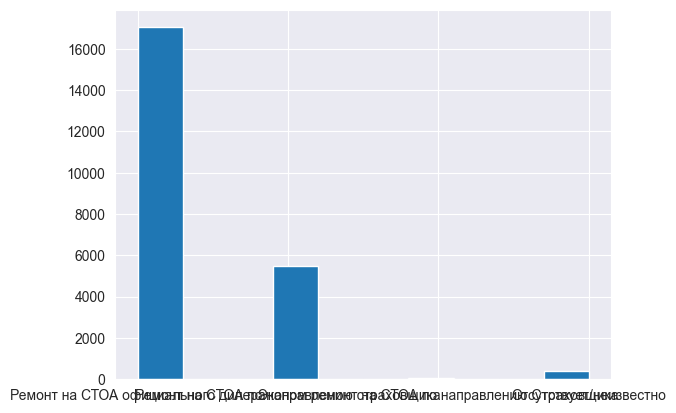

In [315]:
h = db['repair_option'].hist()
fig = h.get_figure()

In [317]:
db['is_Moscow'] = db['region'] == 'Москва'
db['is_Moscow'] = db['is_Moscow'].astype(int)

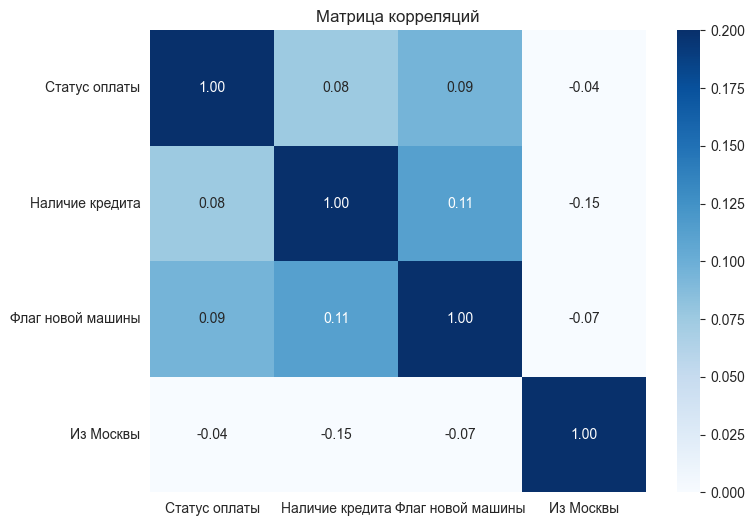

In [349]:
ForCorrel = db[['paid_flg', 'vehicle_credit_flg', 'vehicle_new_flg', 'is_Moscow']]
ForCorrel = ForCorrel.rename(columns={'paid_flg': 'Статус оплаты', 'vehicle_credit_flg': 'Наличие кредита', 'vehicle_new_flg': 'Флаг новой машины', 'is_Moscow': 'Из Москвы'})
Corr = ForCorrel.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="Blues", fmt='.2f', vmax=0.2, vmin=0)
plt.title('Матрица корреляций')
plt.show()

<Axes: >

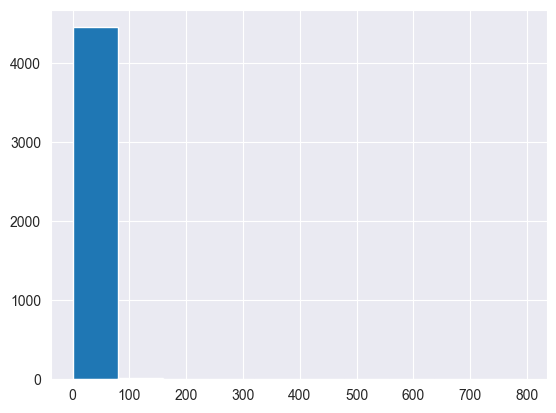

In [351]:
db['auto_cost'].value_counts().hist()

In [353]:
db

,policy_rk,coverage,repair_option,region,auto_make,auto_model,insurant_gender_cd,total_premium_amt,paid_flg,auto_cost,...,transition_flg,premium_transition_amt,renewed_issue_flg,renewed_paid_flg,k,age_of_car,new_and_credit,new_or_credit,new_credit,is_Moscow
0,283363056,Полное КАСКО,Ремонт на СТОА официального дилера,Иркутская область,Mazda,Mazda CX-9,M,787323.60,1,2340000.0,...,0.0,0.0,0,0,2.972094,4.0,0.0,0.0,0.0,0
1,283392099,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Subaru,Subaru Legacy,M,33526.08,1,1765800.0,...,0.0,0.0,1,1,52.669444,3.0,0.0,0.0,0.0,1
2,283592373,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Nissan,Nissan X-Trail,M,540900.00,0,2200000.0,...,0.0,0.0,0,0,4.067295,1.0,0.0,1.0,1.0,1
3,283594449,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Mini (BMW),Mini (BMW) Countryman,F,374400.00,0,2325000.0,...,1.0,626679.0,0,0,6.209936,2.0,0.0,0.0,0.0,1
4,283594911,Полное КАСКО,Ремонт на СТОА по направлению страховщика,Санкт-Петербург,Renault,Renault Kaptur,F,231300.00,1,1390000.0,...,0.0,0.0,0,0,6.009511,4.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,392100519,Полное КАСКО,Ремонт на СТОА официального дилера,Москва,Hyundai,Hyundai Grand Starex,M,545949.90,1,3600000.0,...,0.0,0.0,1,0,6.594012,2.0,0.0,0.0,0.0,1
22971,392728452,Тоталь + Угон,Ремонт на СТОА официального дилера,Чувашская республика,Lada,Lada Largus,M,98100.00,1,520000.0,...,0.0,0.0,1,1,5.300714,4.0,0.0,1.0,2.0,0
22972,393376635,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Sportage,M,127800.00,0,1737547.0,...,1.0,214731.0,0,0,13.595829,3.0,0.0,1.0,2.0,0
22973,394837443,Тоталь + Угон,Ремонт на СТОА официального дилера,Нижегородская область,Kia,Kia Seltos,M,99000.00,0,1698387.0,...,1.0,129114.0,0,0,17.155424,2.0,0.0,1.0,2.0,0


In [355]:
db['min_driver_experience_years_cnt'].mean()

np.float64(14.531923830250273)

In [ ]:
1